In [42]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel, TFTModel
from darts.utils.likelihood_models import QuantileRegression

import os, os.path  
import pickle5 as pickle
from glob import glob
import os



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
ROOT_PATH = 'C:\\Users\\sky\\DESKTOP\\argo2\\'

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    #f_in = ROOT_PATH + split + "/" + city + "_inputs"
    f_in = ROOT_PATH + split + "\\" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        #f_out = ROOT_PATH + split + "/" + city + "_outputs"
        f_out = ROOT_PATH + split + "\\" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs
    

In [44]:
split = 'train'
cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
#cities = ["palo-alto"] # testing only

scaler = 1500


posX = []
posY = []

for city in cities:
    data = get_city_trajectories(city = city, split = split)
    for each in range(len(data[0])):
        each_series = []
        each_series.extend(data[0][each][:,0].tolist())
        each_series.extend(data[1][each][:,0].tolist())
        df = (pd.DataFrame (each_series, columns = ['pos'])/scaler).astype(np.float32)
        df.insert(0, 'time_index', range(len(df)))
        posX.append(TimeSeries.from_dataframe(df, 'time_index', 'pos'))
        
        each_series = []
        each_series.extend(data[0][each][:,1].tolist())
        each_series.extend(data[1][each][:,1].tolist())
        df = (pd.DataFrame (each_series, columns = ['pos'])/scaler).astype(np.float32)
        df.insert(0, 'time_index', range(len(df)))
        posY.append(TimeSeries.from_dataframe(df, 'time_index', 'pos'))

c = int(len(posX) * 0.8)
posX_train, posY_train = posX[:c], posY[:c]
posX_test, posY_test = posX[c:], posY[c:]

In [ ]:
model = NBEATSModel(input_chunk_length=50, output_chunk_length=60, random_state=42,
                    torch_device_str='cuda',
                    num_stacks=30,
                    num_blocks=2,
                    num_layers=4,
                    layer_widths=256,
                    n_epochs=1000,
                    nr_epochs_val_period=1,
                    batch_size=100,
                    log_tensorboard=True,
                    optimizer_kwargs={'lr': 1e-6},
                   )

model.fit(posX_train, past_covariates=posY_train, val_series=posX_test, val_past_covariates=posY_test, verbose=True)

[2022-04-02 19:07:22,505] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04-02 19:07:22,505] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04

Epoch 0:  80%|██████████████████████▍     | 1631/2039 [04:42<01:10,  5.78it/s, loss=1.24, v_num=logs, train_loss=1.060]
Validating: 0it [00:00, ?it/s]
Epoch 0:  90%|█████████████████████████   | 1826/2039 [04:51<00:33,  6.27it/s, loss=1.24, v_num=logs, train_loss=1.060]


Epoch 0:  99%|███████████████████████████▊| 2024/2039 [05:00<00:02,  6.74it/s, loss=1.24, v_num=logs, train_loss=1.060]


Epoch 1:   8%|▉           | 168/2039 [00:27<05:08,  6.06it/s, loss=0.786, v_num=logs, train_loss=0.600, val_loss=0.901]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 2:  80%|████▊ | 1632/2039 [04:30<01:07,  6.03it/s, loss=0.00297, v_num=logs, train_loss=0.00281, val_loss=0.0332]
Validating: 0it [00:00, ?it/s]
Epoch 2:  89%|█████▎| 1824/2039 [04:38<00:32,  6.54it/s, loss=0.00297, v_num=logs, train_loss=0.00281, val_loss=0.0332]


Epoch 2:  99%|█████▉| 2022/2039 [04:47<00:02,  7.03it/s, loss=0.00297, v_num=logs, train_loss=0.00281, val_loss=0.0332]


Epoch 3:  80%|███▏| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000936, v_num=logs, train_loss=0.00083, val_loss=0.00534]
Validating: 0it [00:00, ?it/s]
Epoch 3:  89%|███▌| 1806/2039 [04:55<00:38,  6.10it/s, loss=0.000936, v_num=logs, train_loss=0.00083, val_loss=0.00534]


Epoch 3:  98%|███▉| 2004/2039 [05:04<00:05,  6.58it/s, loss=0.000936, v_num=logs, train_loss=0.00083, val_loss=0.00534]


Epoch 4:  80%|███▏| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000599, v_num=logs, train_loss=0.000616, val_loss=0.0025]
Validating: 0it [00:00, ?it/s]
Epoch 4:  88%|███▌| 1788/2039 [04:54<00:41,  6.07it/s, loss=0.000599, v_num=logs, train_loss=0.000616, val_loss=0.0025]


Epoch 4:  97%|███▉| 1986/2039 [05:02<00:08,  6.56it/s, loss=0.000599, v_num=logs, train_loss=0.000616, val_loss=0.0025]


Epoch 5:  80%|██▍| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000538, v_num=logs, train_loss=0.000543, val_loss=0.00175]
Validating: 0it [00:00, ?it/s]
Epoch 5:  87%|██▌| 1770/2039 [04:53<00:44,  6.04it/s, loss=0.000538, v_num=logs, train_loss=0.000543, val_loss=0.00175]


Epoch 5:  97%|██▉| 1968/2039 [05:01<00:10,  6.52it/s, loss=0.000538, v_num=logs, train_loss=0.000543, val_loss=0.00175]


Epoch 6:  80%|██▍| 1632/2039 [04:46<01:11,  5.70it/s, loss=0.000522, v_num=logs, train_loss=0.000643, val_loss=0.00133]
Validating: 0it [00:00, ?it/s]
Epoch 6:  86%|██▌| 1752/2039 [04:51<00:47,  6.01it/s, loss=0.000522, v_num=logs, train_loss=0.000643, val_loss=0.00133]


Epoch 6:  96%|██▊| 1950/2039 [05:00<00:13,  6.50it/s, loss=0.000522, v_num=logs, train_loss=0.000643, val_loss=0.00133]


Epoch 7:  80%|██▍| 1632/2039 [04:46<01:11,  5.70it/s, loss=0.000447, v_num=logs, train_loss=0.000398, val_loss=0.00119]
Validating: 0it [00:00, ?it/s]
Epoch 7:  85%|██▌| 1734/2039 [04:50<00:51,  5.96it/s, loss=0.000447, v_num=logs, train_loss=0.000398, val_loss=0.00119]


Epoch 7:  95%|██▊| 1932/2039 [04:59<00:16,  6.45it/s, loss=0.000447, v_num=logs, train_loss=0.000398, val_loss=0.00119]


Epoch 8:  80%|██▍| 1632/2039 [04:44<01:10,  5.74it/s, loss=0.000455, v_num=logs, train_loss=0.000354, val_loss=0.00102]
Validating: 0it [00:00, ?it/s]
Epoch 8:  84%|██▌| 1716/2039 [04:47<00:54,  5.96it/s, loss=0.000455, v_num=logs, train_loss=0.000354, val_loss=0.00102]


Epoch 8:  94%|██▊| 1914/2039 [04:56<00:19,  6.45it/s, loss=0.000455, v_num=logs, train_loss=0.000354, val_loss=0.00102]


Epoch 9:  80%|█▌| 1632/2039 [04:49<01:12,  5.64it/s, loss=0.000439, v_num=logs, train_loss=0.000356, val_loss=0.000978]
Validating: 0it [00:00, ?it/s]
Epoch 9:  83%|█▋| 1698/2039 [04:52<00:58,  5.81it/s, loss=0.000439, v_num=logs, train_loss=0.000356, val_loss=0.000978]


Epoch 9:  93%|█▊| 1896/2039 [05:00<00:22,  6.30it/s, loss=0.000439, v_num=logs, train_loss=0.000356, val_loss=0.000978]


Epoch 10:  80%|█▌| 1632/2039 [04:46<01:11,  5.70it/s, loss=0.000437, v_num=logs, train_loss=0.00048, val_loss=0.000916]
Validating: 0it [00:00, ?it/s]
Epoch 10:  82%|█▋| 1680/2039 [04:48<01:01,  5.82it/s, loss=0.000437, v_num=logs, train_loss=0.00048, val_loss=0.000916]


Epoch 10:  92%|█▊| 1878/2039 [04:57<00:25,  6.32it/s, loss=0.000437, v_num=logs, train_loss=0.00048, val_loss=0.000916]


Epoch 11:  80%|█▌| 1632/2039 [04:46<01:11,  5.70it/s, loss=0.000429, v_num=logs, train_loss=0.000382, val_loss=0.00089]
Validating: 0it [00:00, ?it/s]
Epoch 11:  82%|█▋| 1662/2039 [04:47<01:05,  5.78it/s, loss=0.000429, v_num=logs, train_loss=0.000382, val_loss=0.00089]


Epoch 11:  91%|█▊| 1860/2039 [04:56<00:28,  6.28it/s, loss=0.000429, v_num=logs, train_loss=0.000382, val_loss=0.00089]


Epoch 12:  80%|▊| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000456, v_num=logs, train_loss=0.000456, val_loss=0.000882]
Validating: 0it [00:00, ?it/s]
Epoch 12:  81%|▊| 1644/2039 [04:48<01:09,  5.70it/s, loss=0.000456, v_num=logs, train_loss=0.000456, val_loss=0.000882]


Epoch 12:  90%|▉| 1842/2039 [04:56<00:31,  6.21it/s, loss=0.000456, v_num=logs, train_loss=0.000456, val_loss=0.000882]


Epoch 12: 100%|█| 2039/2039 [05:05<00:00,  6.68it/s, loss=0.000456, v_num=logs, train_loss=0.000456, val_loss=0.000865]


Epoch 13:  80%|▊| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000443, v_num=logs, train_loss=0.000459, val_loss=0.000865]
Validating: 0it [00:00, ?it/s]
Epoch 13:  89%|▉| 1824/2039 [04:55<00:34,  6.16it/s, loss=0.000443, v_num=logs, train_loss=0.000459, val_loss=0.000865]


Epoch 13:  99%|▉| 2022/2039 [05:04<00:02,  6.64it/s, loss=0.000443, v_num=logs, train_loss=0.000459, val_loss=0.000865]


Epoch 14:  80%|█▌| 1632/2039 [04:48<01:11,  5.67it/s, loss=0.000424, v_num=logs, train_loss=0.000169, val_loss=0.00083]
Validating: 0it [00:00, ?it/s]
Epoch 14:  89%|█▊| 1806/2039 [04:55<00:38,  6.11it/s, loss=0.000424, v_num=logs, train_loss=0.000169, val_loss=0.00083]


Epoch 14:  98%|█▉| 2004/2039 [05:04<00:05,  6.59it/s, loss=0.000424, v_num=logs, train_loss=0.000169, val_loss=0.00083]


Epoch 15:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000421, v_num=logs, train_loss=0.000414, val_loss=0.000819]
Validating: 0it [00:00, ?it/s]
Epoch 15:  88%|▉| 1788/2039 [04:53<00:41,  6.08it/s, loss=0.000421, v_num=logs, train_loss=0.000414, val_loss=0.000819]


Epoch 15:  97%|▉| 1986/2039 [05:02<00:08,  6.57it/s, loss=0.000421, v_num=logs, train_loss=0.000414, val_loss=0.000819]


Epoch 16:  80%|▊| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000382, v_num=logs, train_loss=0.000261, val_loss=0.000848]
Validating: 0it [00:00, ?it/s]
Epoch 16:  87%|▊| 1770/2039 [04:53<00:44,  6.02it/s, loss=0.000382, v_num=logs, train_loss=0.000261, val_loss=0.000848]


Epoch 16:  97%|▉| 1968/2039 [05:02<00:10,  6.51it/s, loss=0.000382, v_num=logs, train_loss=0.000261, val_loss=0.000848]


Epoch 17:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000395, v_num=logs, train_loss=0.000388, val_loss=0.000801]
Validating: 0it [00:00, ?it/s]
Epoch 17:  86%|▊| 1752/2039 [04:52<00:47,  5.99it/s, loss=0.000395, v_num=logs, train_loss=0.000388, val_loss=0.000801]


Epoch 17:  96%|▉| 1950/2039 [05:00<00:13,  6.48it/s, loss=0.000395, v_num=logs, train_loss=0.000388, val_loss=0.000801]


Epoch 18:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000376, v_num=logs, train_loss=0.000373, val_loss=0.000826]
Validating: 0it [00:00, ?it/s]
Epoch 18:  85%|▊| 1737/2039 [04:52<00:50,  5.95it/s, loss=0.000376, v_num=logs, train_loss=0.000373, val_loss=0.000826]


Epoch 18:  95%|▉| 1935/2039 [05:00<00:16,  6.44it/s, loss=0.000376, v_num=logs, train_loss=0.000373, val_loss=0.000826]


Epoch 19:  80%|▊| 1632/2039 [04:46<01:11,  5.69it/s, loss=0.000405, v_num=logs, train_loss=0.000315, val_loss=0.000757]
Validating: 0it [00:00, ?it/s]
Epoch 19:  84%|▊| 1719/2039 [04:50<00:54,  5.91it/s, loss=0.000405, v_num=logs, train_loss=0.000315, val_loss=0.000757]


Epoch 19:  94%|▉| 1917/2039 [04:59<00:19,  6.41it/s, loss=0.000405, v_num=logs, train_loss=0.000315, val_loss=0.000757]


Epoch 20:  80%|██▍| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000408, v_num=logs, train_loss=0.0005, val_loss=0.000768]
Validating: 0it [00:00, ?it/s]
Epoch 20:  83%|██▌| 1701/2039 [04:50<00:57,  5.86it/s, loss=0.000408, v_num=logs, train_loss=0.0005, val_loss=0.000768]


Epoch 20:  93%|██▊| 1899/2039 [04:58<00:22,  6.36it/s, loss=0.000408, v_num=logs, train_loss=0.0005, val_loss=0.000768]


Epoch 21:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000381, v_num=logs, train_loss=0.000358, val_loss=0.000792]
Validating: 0it [00:00, ?it/s]
Epoch 21:  83%|▊| 1683/2039 [04:49<01:01,  5.81it/s, loss=0.000381, v_num=logs, train_loss=0.000358, val_loss=0.000792]


Epoch 21:  92%|▉| 1881/2039 [04:58<00:25,  6.31it/s, loss=0.000381, v_num=logs, train_loss=0.000358, val_loss=0.000792]


Epoch 22:  80%|█▌| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000382, v_num=logs, train_loss=0.00039, val_loss=0.000776]
Validating: 0it [00:00, ?it/s]
Epoch 22:  82%|█▋| 1665/2039 [04:49<01:04,  5.76it/s, loss=0.000382, v_num=logs, train_loss=0.00039, val_loss=0.000776]


Epoch 22:  91%|█▊| 1863/2039 [04:57<00:28,  6.26it/s, loss=0.000382, v_num=logs, train_loss=0.00039, val_loss=0.000776]


Epoch 23:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000415, v_num=logs, train_loss=0.000502, val_loss=0.000769]
Validating: 0it [00:00, ?it/s]
Epoch 23:  81%|▊| 1647/2039 [04:48<01:08,  5.72it/s, loss=0.000415, v_num=logs, train_loss=0.000502, val_loss=0.000769]


Epoch 23:  90%|▉| 1845/2039 [04:56<00:31,  6.22it/s, loss=0.000415, v_num=logs, train_loss=0.000502, val_loss=0.000769]


Epoch 24:  80%|▊| 1632/2039 [04:47<01:11,  5.67it/s, loss=0.000375, v_num=logs, train_loss=0.000489, val_loss=0.000755]
Validating: 0it [00:00, ?it/s]


Epoch 24:  90%|▉| 1827/2039 [04:56<00:34,  6.17it/s, loss=0.000375, v_num=logs, train_loss=0.000489, val_loss=0.000755]


Epoch 24:  99%|▉| 2025/2039 [05:04<00:02,  6.65it/s, loss=0.000375, v_num=logs, train_loss=0.000489, val_loss=0.000755]


Epoch 25:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000413, v_num=logs, train_loss=0.000513, val_loss=0.000729]
Validating: 0it [00:00, ?it/s]
Epoch 25:  89%|▉| 1809/2039 [04:55<00:37,  6.13it/s, loss=0.000413, v_num=logs, train_loss=0.000513, val_loss=0.000729]


Epoch 25:  98%|▉| 2007/2039 [05:03<00:04,  6.61it/s, loss=0.000413, v_num=logs, train_loss=0.000513, val_loss=0.000729]


Epoch 26:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000363, v_num=logs, train_loss=0.000201, val_loss=0.000733]
Validating: 0it [00:00, ?it/s]
Epoch 26:  88%|▉| 1791/2039 [04:54<00:40,  6.09it/s, loss=0.000363, v_num=logs, train_loss=0.000201, val_loss=0.000733]


Epoch 26:  98%|▉| 1989/2039 [05:02<00:07,  6.57it/s, loss=0.000363, v_num=logs, train_loss=0.000201, val_loss=0.000733]


Epoch 27:  80%|█▌| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.00038, v_num=logs, train_loss=0.000315, val_loss=0.000711]
Validating: 0it [00:00, ?it/s]
Epoch 27:  87%|█▋| 1770/2039 [04:53<00:44,  6.02it/s, loss=0.00038, v_num=logs, train_loss=0.000315, val_loss=0.000711]


Epoch 27:  97%|█▉| 1968/2039 [05:02<00:10,  6.50it/s, loss=0.00038, v_num=logs, train_loss=0.000315, val_loss=0.000711]


Epoch 28:  80%|▊| 1632/2039 [04:48<01:11,  5.67it/s, loss=0.000359, v_num=logs, train_loss=0.000362, val_loss=0.000707]
Validating: 0it [00:00, ?it/s]
Epoch 28:  86%|▊| 1752/2039 [04:53<00:48,  5.97it/s, loss=0.000359, v_num=logs, train_loss=0.000362, val_loss=0.000707]


Epoch 28:  96%|▉| 1950/2039 [05:01<00:13,  6.46it/s, loss=0.000359, v_num=logs, train_loss=0.000362, val_loss=0.000707]


Epoch 29:  80%|█▌| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000372, v_num=logs, train_loss=0.00034, val_loss=0.000696]
Validating: 0it [00:00, ?it/s]
Epoch 29:  85%|█▋| 1734/2039 [04:53<00:51,  5.92it/s, loss=0.000372, v_num=logs, train_loss=0.00034, val_loss=0.000696]


Epoch 29:  95%|█▉| 1932/2039 [05:01<00:16,  6.40it/s, loss=0.000372, v_num=logs, train_loss=0.00034, val_loss=0.000696]


Epoch 30:  80%|▊| 1632/2039 [04:48<01:11,  5.67it/s, loss=0.000352, v_num=logs, train_loss=0.000448, val_loss=0.000703]
Validating: 0it [00:00, ?it/s]
Epoch 30:  84%|▊| 1716/2039 [04:51<00:54,  5.88it/s, loss=0.000352, v_num=logs, train_loss=0.000448, val_loss=0.000703]


Epoch 30:  94%|▉| 1914/2039 [05:00<00:19,  6.38it/s, loss=0.000352, v_num=logs, train_loss=0.000448, val_loss=0.000703]


Epoch 31:  80%|▊| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000341, v_num=logs, train_loss=0.000289, val_loss=0.000707]
Validating: 0it [00:00, ?it/s]
Epoch 31:  83%|▊| 1698/2039 [04:51<00:58,  5.83it/s, loss=0.000341, v_num=logs, train_loss=0.000289, val_loss=0.000707]


Epoch 31:  93%|▉| 1896/2039 [04:59<00:22,  6.33it/s, loss=0.000341, v_num=logs, train_loss=0.000289, val_loss=0.000707]


Epoch 32:  80%|▊| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000335, v_num=logs, train_loss=0.000261, val_loss=0.000672]
Validating: 0it [00:00, ?it/s]
Epoch 32:  82%|▊| 1680/2039 [04:50<01:02,  5.78it/s, loss=0.000335, v_num=logs, train_loss=0.000261, val_loss=0.000672]


Epoch 32:  92%|▉| 1878/2039 [04:59<00:25,  6.28it/s, loss=0.000335, v_num=logs, train_loss=0.000261, val_loss=0.000672]


Epoch 33:  80%|██▍| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000353, v_num=logs, train_loss=0.00037, val_loss=0.00067]
Validating: 0it [00:00, ?it/s]
Epoch 33:  82%|██▍| 1662/2039 [04:49<01:05,  5.74it/s, loss=0.000353, v_num=logs, train_loss=0.00037, val_loss=0.00067]


Epoch 33:  91%|██▋| 1860/2039 [04:58<00:28,  6.24it/s, loss=0.000353, v_num=logs, train_loss=0.00037, val_loss=0.00067]


Epoch 34:  80%|▊| 1632/2039 [04:48<01:11,  5.66it/s, loss=0.000359, v_num=logs, train_loss=0.000329, val_loss=0.000648]
Validating: 0it [00:00, ?it/s]
Epoch 34:  81%|▊| 1644/2039 [04:49<01:09,  5.69it/s, loss=0.000359, v_num=logs, train_loss=0.000329, val_loss=0.000648]


Epoch 34:  90%|▉| 1842/2039 [04:57<00:31,  6.19it/s, loss=0.000359, v_num=logs, train_loss=0.000329, val_loss=0.000648]


Epoch 34: 100%|█| 2039/2039 [05:06<00:00,  6.66it/s, loss=0.000359, v_num=logs, train_loss=0.000329, val_loss=0.000647]


Epoch 35:  80%|▊| 1632/2039 [04:47<01:11,  5.69it/s, loss=0.000329, v_num=logs, train_loss=0.000349, val_loss=0.000647]
Validating: 0it [00:00, ?it/s]
Epoch 35:  89%|▉| 1824/2039 [04:55<00:34,  6.18it/s, loss=0.000329, v_num=logs, train_loss=0.000349, val_loss=0.000647]


Epoch 35:  99%|▉| 2022/2039 [05:03<00:02,  6.65it/s, loss=0.000329, v_num=logs, train_loss=0.000349, val_loss=0.000647]


Epoch 36:  80%|█▌| 1632/2039 [04:46<01:11,  5.69it/s, loss=0.000299, v_num=logs, train_loss=0.00021, val_loss=0.000653]
Validating: 0it [00:00, ?it/s]
Epoch 36:  89%|█▊| 1806/2039 [04:54<00:37,  6.13it/s, loss=0.000299, v_num=logs, train_loss=0.00021, val_loss=0.000653]


Epoch 36:  98%|█▉| 2004/2039 [05:02<00:05,  6.61it/s, loss=0.000299, v_num=logs, train_loss=0.00021, val_loss=0.000653]


Epoch 37:  80%|▊| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000318, v_num=logs, train_loss=0.000265, val_loss=0.000658]
Validating: 0it [00:00, ?it/s]
Epoch 37:  88%|▉| 1788/2039 [04:53<00:41,  6.08it/s, loss=0.000318, v_num=logs, train_loss=0.000265, val_loss=0.000658]


Epoch 37:  97%|▉| 1986/2039 [05:02<00:08,  6.57it/s, loss=0.000318, v_num=logs, train_loss=0.000265, val_loss=0.000658]


Epoch 38:  80%|▊| 1632/2039 [04:46<01:11,  5.69it/s, loss=0.000297, v_num=logs, train_loss=0.000285, val_loss=0.000632]
Validating: 0it [00:00, ?it/s]
Epoch 38:  87%|▊| 1770/2039 [04:52<00:44,  6.04it/s, loss=0.000297, v_num=logs, train_loss=0.000285, val_loss=0.000632]


Epoch 38:  97%|▉| 1968/2039 [05:01<00:10,  6.53it/s, loss=0.000297, v_num=logs, train_loss=0.000285, val_loss=0.000632]


Epoch 39:  80%|▊| 1632/2039 [04:46<01:11,  5.69it/s, loss=0.000323, v_num=logs, train_loss=0.000359, val_loss=0.000639]
Validating: 0it [00:00, ?it/s]
Epoch 39:  86%|▊| 1752/2039 [04:52<00:47,  6.00it/s, loss=0.000323, v_num=logs, train_loss=0.000359, val_loss=0.000639]


Epoch 39:  96%|▉| 1950/2039 [05:00<00:13,  6.48it/s, loss=0.000323, v_num=logs, train_loss=0.000359, val_loss=0.000639]


Epoch 40:  80%|██▍| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000301, v_num=logs, train_loss=0.00023, val_loss=0.00063]
Validating: 0it [00:00, ?it/s]
Epoch 40:  85%|██▌| 1734/2039 [04:51<00:51,  5.95it/s, loss=0.000301, v_num=logs, train_loss=0.00023, val_loss=0.00063]


Epoch 40:  95%|██▊| 1932/2039 [05:00<00:16,  6.44it/s, loss=0.000301, v_num=logs, train_loss=0.00023, val_loss=0.00063]


Epoch 41:  80%|▊| 1632/2039 [04:46<01:11,  5.69it/s, loss=0.000279, v_num=logs, train_loss=0.000293, val_loss=0.000588]
Validating: 0it [00:00, ?it/s]
Epoch 41:  84%|▊| 1716/2039 [04:50<00:54,  5.90it/s, loss=0.000279, v_num=logs, train_loss=0.000293, val_loss=0.000588]


Epoch 41:  94%|▉| 1914/2039 [04:59<00:19,  6.40it/s, loss=0.000279, v_num=logs, train_loss=0.000293, val_loss=0.000588]


Epoch 42:  80%|█▌| 1632/2039 [04:47<01:11,  5.68it/s, loss=0.000283, v_num=logs, train_loss=0.00035, val_loss=0.000587]
Validating: 0it [00:00, ?it/s]
Epoch 42:  83%|█▋| 1698/2039 [04:50<00:58,  5.85it/s, loss=0.000283, v_num=logs, train_loss=0.00035, val_loss=0.000587]


Epoch 42:  93%|█▊| 1896/2039 [04:58<00:22,  6.35it/s, loss=0.000283, v_num=logs, train_loss=0.00035, val_loss=0.000587]


Epoch 43:  80%|█▌| 1632/2039 [04:46<01:11,  5.70it/s, loss=0.000278, v_num=logs, train_loss=0.00024, val_loss=0.000584]
Validating: 0it [00:00, ?it/s]
Epoch 43:  82%|█▋| 1680/2039 [04:48<01:01,  5.83it/s, loss=0.000278, v_num=logs, train_loss=0.00024, val_loss=0.000584]


Epoch 43:  92%|█▊| 1878/2039 [04:56<00:25,  6.33it/s, loss=0.000278, v_num=logs, train_loss=0.00024, val_loss=0.000584]


Validating:  79%|█████████████████████████████████████████████████████▌              | 321/408 [00:13<00:03, 23.12it/s]

In [ ]:
model.save_model(model_path)
loaded_model = model.load_model(model_path)

In [17]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]

model = TFTModel(
    input_chunk_length=50,
    output_chunk_length=60,
    torch_device_str='cuda',
    hidden_size=128,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=1000,
    n_epochs=30000,
    add_relative_index=True,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
    optimizer_kwargs={'lr': 1e-7},
    log_tensorboard=True,
)


model.fit(posX_train, past_covariates=posY_train, val_series=posX_test, val_past_covariates=posY_test, verbose=True)

[2022-04-02 10:29:51,266] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04-02 10:29:51,266] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-04

Epoch 156:  90%|████████████████████████████▊   | 9/10 [00:05<00:00,  1.62it/s, loss=6.2, v_num=logs, train_loss=6.490]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 313:  50%|███████████████▌               | 5/10 [00:03<00:03,  1.45it/s, loss=5.69, v_num=logs, train_loss=5.820]

C:\Users\sky\anaconda3\envs\darts\lib\site-packages\pytorch_lightning\trainer\trainer.py:688: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


466
Predicting: 67it [00:00, ?it/s]


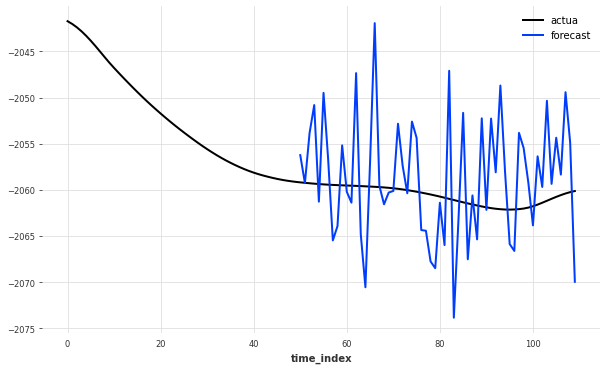

In [41]:
idx = np.random.randint(len(posX_test))
print(idx)
pred = model.predict(series=posX_test[idx][:50], past_covariates=posY_test[idx][:50], n=60)

plt.figure(figsize=(10, 6))
(posX_test[idx]*scaler).plot(label="actua")
(pred*scaler).plot(label="forecast")



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


24
Predicting: 5it [00:00, ?it/s]


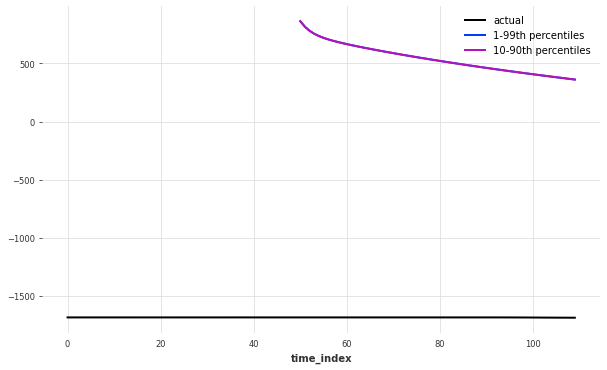

In [19]:
lowest_q, low_q, high_q, highest_q = 0.01, 0.1, 0.9, 0.99
label_q_outer = f"{int(lowest_q * 100)}-{int(highest_q * 100)}th percentiles"
label_q_inner = f"{int(low_q * 100)}-{int(high_q * 100)}th percentiles"

idx = np.random.randint(len(posX_test))
print(idx)
pred = model.predict(series=posX_test[idx][:50], past_covariates=posY_test[idx][:50], n=60)

plt.figure(figsize=(10, 6))
(posX_test[idx]*scaler).plot(label="actual")
(pred*scaler).plot(low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer)
(pred*scaler).plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)